In this project we are going to train a neural network to interpolate a function.

In [ ]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display

In [ ]:
def f(x):
    return torch.tensor(2*x+1)

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 4),
    nn.ReLU(),
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 2),
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.07,momentum=0.9)

In [ ]:
lossList=[]
num_iter=[]
output_list=[]
desiredOutput_list=[]

for i in range(100):

    x = float(random.randrange(0,10))/10

    desiredOutput = f(x)

    #################### output of model and loss
    output_model_a , output_model_b = model(torch.tensor([x]))
    A=output_model_a.squeeze()
    B=output_model_b.squeeze()
    loss = criterion(A*x+B, f(x))

    #################### make list for plot
    output= A.item()*x+B.item()
    output_list.append(output)
    desiredOutput_list.append(f(x).item())
    #################### update neural network weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

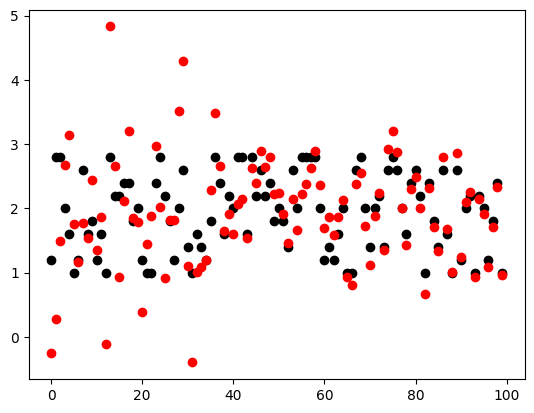

In [ ]:
#################### plot
plt.plot (desiredOutput_list,'o',color='black')
plt.plot (output_list, 'o', color='red')


In [ ]:
print(A.item(),B.item())

2.0109684467315674 0.9557873010635376


In [ ]:
def f(x):
    return torch.tensor(2*x+1)
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
fu=[]
li=[]
for j in x:
    fu.append(f(j).item())
    li.append(A.item()*j+B.item())

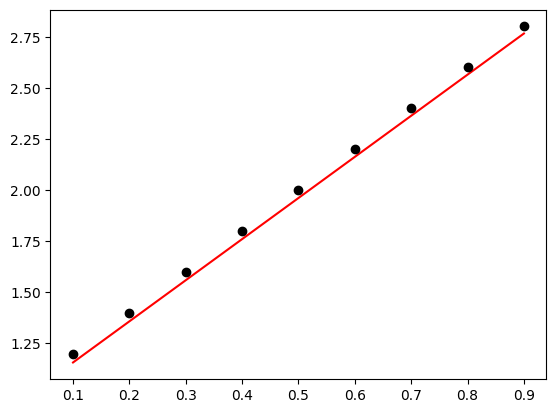

In [ ]:
plt.plot(x,li,color='red')
plt.plot(x,fu,'o',color='black')

In [ ]:
print(loss)

tensor(0.0020, grad_fn=<MseLossBackward0>)
